In [68]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
import sklearn.metrics as metrics
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,roc_auc_score,recall_score,classification_report,mean_squared_error,accuracy_score,f1_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE,SVMSMOTE,KMeansSMOTE,SMOTENC,BorderlineSMOTE

In [54]:
train=pd.read_csv("train_mod.csv")
test=pd.read_csv("test_mod.csv")

#label encoding the features for the modelling process
le=LabelEncoder()
le.fit(train["color_type"])
# train["color_type"]=le.fit_transform(train["color_type"])
train["color_type"]=le.transform(train["color_type"])
test["color_type"]=le.transform(test["color_type"])

In [55]:
train_full=train.drop(['pet_id', 'issue_date', 'listing_date','breed_category', 'pet_category','days_stayed']
                          ,axis=1)
train_full_breed=train.breed_category
train_full_pet=train.pet_category
test_full=test.drop(['pet_id', 'issue_date', 'listing_date','days_stayed']
                          ,axis=1)


In [71]:
help(KMeansSMOTE)

Help on class KMeansSMOTE in module imblearn.over_sampling._smote:

class KMeansSMOTE(BaseSMOTE)
 |  KMeansSMOTE(sampling_strategy='auto', random_state=None, k_neighbors=2, n_jobs=None, kmeans_estimator=None, cluster_balance_threshold='auto', density_exponent='auto')
 |  
 |  Apply a KMeans clustering before to over-sample using SMOTE.
 |  
 |  This is an implementation of the algorithm described in [1]_.
 |  
 |  Read more in the :ref:`User Guide <smote_adasyn>`.
 |  
 |  Parameters
 |  ----------
 |  sampling_strategy : float, str, dict or callable, default='auto'
 |      Sampling information to resample the data set.
 |  
 |      - When ``float``, it corresponds to the desired ratio of the number of
 |        samples in the minority class over the number of samples in the
 |        majority class after resampling. Therefore, the ratio is expressed as
 |        :math:`\alpha_{os} = N_{rm} / N_{M}` where :math:`N_{rm}` is the
 |        number of samples in the minority class after res

In [73]:
sm = BorderlineSMOTE(random_state = 42)
X_train_breed, y_train_breed = sm.fit_sample(train_full, train_full_breed.ravel())
X_train_pet, y_train_pet = sm.fit_sample(train_full, train_full_pet.ravel())

X_train_breed.shape,y_train_breed.shape,X_train_pet.shape,y_train_pet.shape

((27000, 9), (27000,), (42484, 9), (42484,))

In [66]:
# X_train_breed, y_train_breed = sm.fit_sample(X_train_breed, y_train_breed.ravel())
# X_train_pet, y_train_pet = sm.fit_sample(X_train_pet, y_train_pet.ravel())
# X_train_breed.shape,y_train_breed.shape,X_train_pet.shape,y_train_pet.shape

ValueError: No samples will be generated with the provided ratio settings.

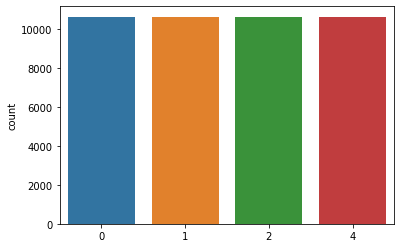

In [74]:
sns.countplot(y_train_pet)

In [58]:
lrc = LogisticRegression()
rfc=RandomForestClassifier()
adbc=AdaBoostClassifier()
bgc=BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dtc = DecisionTreeClassifier()
bgcl_lrc = BaggingClassifier(base_estimator=lrc, random_state=42)
ab_rfc = AdaBoostClassifier(base_estimator=rfc,random_state=42)
ab_dtc = AdaBoostClassifier(base_estimator=dtc,random_state=42)
ab_nbc=  AdaBoostClassifier(base_estimator=gnb,random_state=42)
ab_lrc=  AdaBoostClassifier(base_estimator=lrc,random_state=42)
gbc=GradientBoostingClassifier()
ab_gbc=  AdaBoostClassifier(base_estimator=gbc,random_state=42)
xgbc=XGBClassifier()
ab_xgbc=  AdaBoostClassifier(base_estimator=xgbc,random_state=42)
lgbc=LGBMClassifier()
cat=CatBoostClassifier()

In [75]:
models=[lrc,rfc,adbc,bgc,gnb,knn,dtc,bgcl_lrc,gbc,xgbc,lgbc]


def pred_on_full_data(Xtrain,Xtrain2,ytrain,ytrain2,Xtest,models):
    for model in models:
        print(model.__class__.__name__)
        model.fit(Xtrain, ytrain)
        y_test_pred_breed = model.predict(Xtest)
        model.fit(Xtrain2, ytrain2)
        y_test_pred2_pet=model.predict(Xtest)
        id=pd.Series(test["pet_id"])
        submission=pd.DataFrame({'pet_id':id,'breed_category':y_test_pred_breed,'pet_category':y_test_pred2_pet})
#         predictions=pd.concat([test['INCIDENT_ID'],pd.DataFrame(y_test_pred,columns=['MULTIPLE_OFFENSE'])],1)
        a="submission_multiple_smote"+model.__class__.__name__+"submission.csv"
        submission.to_csv(a,index=False)
        
# catboost
# models=[cat]


# def pred_on_full_data(Xtrain,Xtrain2,ytrain,ytrain2,Xtest,models):
#     for model in models:
#         print(model.__class__.__name__)
#         model.fit(Xtrain, ytrain)
#         y_test_pred_breed = model.predict(Xtest)[:,0]
#         model.fit(Xtrain2, ytrain2)
#         y_test_pred2_pet=model.predict(Xtest)[:,0]
#         id=pd.Series(test["pet_id"])
#         submission=pd.DataFrame({'pet_id':id,'breed_category':y_test_pred_breed,'pet_category':y_test_pred2_pet})
# #         predictions=pd.concat([test['INCIDENT_ID'],pd.DataFrame(y_test_pred,columns=['MULTIPLE_OFFENSE'])],1)
#         a="submission_multiple_"+model.__class__.__name__+"submission.csv"
#         submission.to_csv(a,index=False)
# getting predictions on full data
pred_on_full_data(Xtrain=X_train_breed,Xtrain2=X_train_pet,ytrain=y_train_breed,ytrain2=y_train_pet,Xtest=test_full,models=models)

LogisticRegression
RandomForestClassifier
AdaBoostClassifier
BaggingClassifier
GaussianNB
KNeighborsClassifier
DecisionTreeClassifier
BaggingClassifier
GradientBoostingClassifier
XGBClassifier
LGBMClassifier
